# Ex 8: Anomaly detection
We will build a model to detect anomalous behaviours in server computers using a Gaussian model.

> https://python.quantecon.org/multivariate_normal.html

> https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.multivariate_normal.html


In [1]:
# Importing the needed libraries
# import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# We'll use loadmap to load the matlab dataset
from scipy.io import loadmat
from scipy.stats import multivariate_normal

# tells matplotlib to embed plots within the notebook
%matplotlib inline

from sklearn.metrics import f1_score  #, classification_report, ConfusionMatrixDisplay


In [2]:
# Loading all data on a dictonary
data = loadmat('ex8data1.mat')

In [3]:
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'Xval', 'yval'])

In [4]:
X=data['X']
Xval=data['Xval']
yval=data['yval']

(0.0, 30.0)

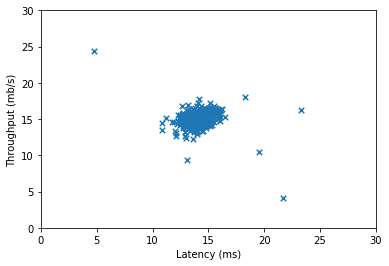

In [5]:
plt.scatter(X[:,0], X[:,1], marker='x', s=30)
plt.xlabel('Latency (ms)')
plt.ylabel('Throughput (mb/s)')
plt.xlim([0,30])
plt.ylim([0,30])

## Estimate the Gaussian

In [6]:
mu = np.mean(X, axis=0)
sigma2= np.var(X,axis=0)
mu.shape, sigma2.shape

((2,), (2,))

In [7]:
pval = multivariate_normal(mean=mu, cov=sigma2)
u, v = np.mgrid[0:30:.01, 0:30:.01]
pos = np.dstack((u,v))

In [8]:
[10**(i) for i in range(-20, 0, 3)]

[1e-20, 1e-17, 1e-14, 1e-11, 1e-08, 1e-05, 0.01]

(0.0, 30.0)

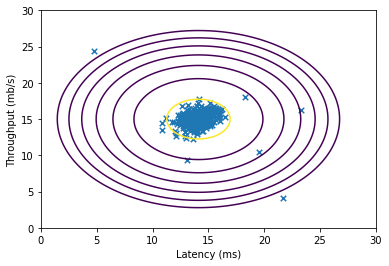

In [9]:
epsilons = [10**(i) for i in range(-20, 0, 3)]
plt.contour(u, v, pval.pdf(pos), epsilons)
plt.scatter(X[:,0], X[:,1], marker='x', s=30)
plt.xlabel('Latency (ms)')
plt.ylabel('Throughput (mb/s)')
plt.xlim([0,30])
plt.ylim([0,30])

## Find the outliers

In [10]:
def selectThreshold(yval, pval):
    
    bestEpsilon = 0
    bestF1 = 0
    F1 = 0
    yval_pred=np.zeros(yval.shape)
    stepsize=np.linspace(np.min(pval),np.max(pval), 1000)
    
    for epsilon in stepsize:
        yval_pred=np.where(pval>epsilon, 0, 1)
        F1 = f1_score(yval, yval_pred)
        
        if bestF1<F1:
            bestF1 = F1
            bestEpsilon = epsilon
    
    return bestEpsilon, bestF1

In [11]:
epsilon, f1 = selectThreshold(yval, pval.pdf(Xval))
print (f'The best epsilon is:{epsilon:.4E} and the best F1 is:{f1:.6f}')

The best epsilon is:8.9999E-05 and the best F1 is:0.875000


(0.0, 30.0)

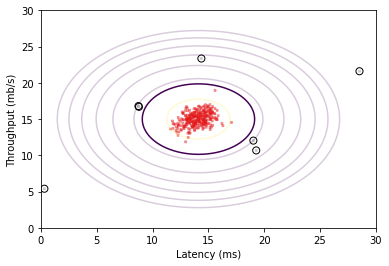

In [12]:
# Change the color based on yval
plt.scatter(Xval[:,0], Xval[:,1], c=yval, cmap='Set1', marker='x', s=5, alpha=0.5)
# Circle around the outlayers we have estimated
plt.scatter(Xval[pval.pdf(Xval)<epsilon][:,0],Xval[pval.pdf(Xval)<epsilon][:,1], 
         s=50, 
         facecolors='none', 
         edgecolors='Black', 
         alpha=1)
plt.contour(u, v, pval.pdf(pos), epsilons, alpha=0.2)
plt.contour(u, v, pval.pdf(pos), list([epsilon]))
plt.xlabel('Latency (ms)')
plt.ylabel('Throughput (mb/s)')
plt.xlim([0,30])
plt.ylim([0,30])

In [13]:
yval_pred=np.zeros(yval.shape)
yval_pred=np.where(pval.pdf(Xval)>epsilon, 0, 1)
print(f'Train f1 Score: {f1_score(yval, yval_pred)}')

Train f1 Score: 0.8750000000000001


### Classified anomalies in the training set

In [14]:
anomalies= np.count_nonzero([pval.pdf(X)<epsilon])
print(f'The number of anomalies is {anomalies}')

The number of anomalies is 6


(0.0, 30.0)

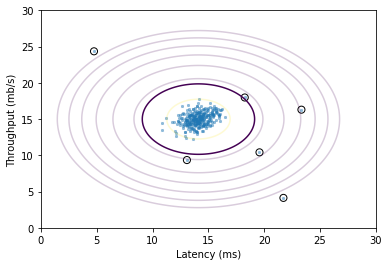

In [15]:
# Change the color based on yval
plt.scatter(X[:,0], X[:,1], cmap='Set1', marker='x', s=5, alpha=0.5)
# Circle around the outlayers we have estimated
plt.scatter(X[pval.pdf(X)<epsilon][:,0],X[pval.pdf(X)<epsilon][:,1], 
         s=50, 
         facecolors='none', 
         edgecolors='Black', 
         alpha=1)
plt.contour(u, v, pval.pdf(pos), epsilons, alpha=0.2)
plt.contour(u, v, pval.pdf(pos), list([epsilon]))
plt.xlabel('Latency (ms)')
plt.ylabel('Throughput (mb/s)')
plt.xlim([0,30])
plt.ylim([0,30])

## High dimensional dataset

In [16]:
# Loading all data on a dictonary
data = loadmat('ex8data2.mat')
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'Xval', 'yval'])

In [17]:
X=data['X']
Xval=data['Xval']
yval=data['yval']

In [18]:
mu = np.mean(X, axis=0)
sigma2= np.var(X,axis=0)
pval = multivariate_normal(mean=mu, cov=sigma2)

In [19]:
epsilon, f1 = selectThreshold(yval, pval.pdf(Xval))
print (f'The best epsilon is:{epsilon:.4E} and the best F1 is:{f1:.6f}')

The best epsilon is:1.3786E-18 and the best F1 is:0.615385


In [20]:
anomalies= np.count_nonzero([pval.pdf(X)<epsilon])
print(f'The number of anomalies is {anomalies}')

The number of anomalies is 117
